In [58]:
import pandas as pd
import scipy.optimize as opt;

epoch = 9

Df = pd.read_csv("../../membershipchainservice/Data/gentree-node_0-epoch"+str(epoch))
Df

,Name,Level,X,Y,cluster,bunch
0,node_0,0,40.309273,254.230121,map[node_13:true],map[node_12:true node_14:true node_16:true nod...
1,node_1,0,106.483033,41.485234,map[node_15:true],map[node_12:true node_14:true node_17:true nod...
2,node_2,0,132.694300,134.865643,map[node_11:true node_13:true node_4:true node...,map[node_12:true node_14:true node_17:true nod...
3,node_3,0,300.684598,93.629285,map[node_10:true node_18:true],map[node_12:true node_14:true node_17:true nod...
4,node_4,0,188.257977,181.688262,map[node_10:true node_11:true node_13:true nod...,map[node_11:true node_12:true node_14:true nod...
5,node_5,0,204.490937,215.145979,map[node_10:true node_11:true node_13:true nod...,map[node_10:true node_11:true node_12:true nod...
6,node_6,2,228.684025,0.631816,map[node_0:true node_1:true node_10:true node_...,map[node_12:true node_14:true node_17:true nod...
7,node_7,2,221.273840,40.282395,map[node_0:true node_1:true node_10:true node_...,map[node_12:true node_14:true node_17:true nod...
8,node_8,1,73.127790,21.698260,map[node_15:true],map[node_12:true node_14:true node_17:true nod...
9,node_9,1,22.538938,190.614628,map[node_0:true node_13:true],map[node_12:true node_14:true node_16:true nod...


In [54]:
cluster = Df["cluster"][1]
import re

regex = r"(node_[0-9]+)"
explode_list_lambda = lambda map_str : [m.group() for m in re.finditer(regex, map_str, re.MULTILINE)]
Df["cluster_list"] = Df["cluster"].apply(explode_list_lambda)
Df["bunch_list"] = Df["bunch"].apply(explode_list_lambda)
Df

,Name,Level,X,Y,cluster,bunch,cluster_list,bunch_list
0,node_0,0,40.309273,254.230121,map[node_13:true],map[node_12:true node_14:true node_16:true nod...,[node_13],"[node_12, node_14, node_16, node_17, node_6, n..."
1,node_1,0,106.483033,41.485234,map[node_15:true],map[node_12:true node_14:true node_17:true nod...,[node_15],"[node_12, node_14, node_17, node_6, node_7]"
2,node_2,0,132.694300,134.865643,map[node_11:true node_13:true node_4:true node...,map[node_12:true node_14:true node_17:true nod...,"[node_11, node_13, node_4, node_5]","[node_12, node_14, node_17, node_6, node_7]"
3,node_3,0,300.684598,93.629285,map[node_10:true node_18:true],map[node_12:true node_14:true node_17:true nod...,"[node_10, node_18]","[node_12, node_14, node_17, node_6, node_7]"
4,node_4,0,188.257977,181.688262,map[node_10:true node_11:true node_13:true nod...,map[node_11:true node_12:true node_14:true nod...,"[node_10, node_11, node_13, node_18, node_5]","[node_11, node_12, node_14, node_17, node_18, ..."
5,node_5,0,204.490937,215.145979,map[node_10:true node_11:true node_13:true nod...,map[node_10:true node_11:true node_12:true nod...,"[node_10, node_11, node_13, node_18, node_4]","[node_10, node_11, node_12, node_13, node_14, ..."
6,node_6,2,228.684025,0.631816,map[node_0:true node_1:true node_10:true node_...,map[node_12:true node_14:true node_17:true nod...,"[node_0, node_1, node_10, node_11, node_12, no...","[node_12, node_14, node_17, node_7]"
7,node_7,2,221.273840,40.282395,map[node_0:true node_1:true node_10:true node_...,map[node_12:true node_14:true node_17:true nod...,"[node_0, node_1, node_10, node_11, node_12, no...","[node_12, node_14, node_17, node_6]"
8,node_8,1,73.127790,21.698260,map[node_15:true],map[node_12:true node_14:true node_17:true nod...,[node_15],"[node_12, node_14, node_17, node_6, node_7]"
9,node_9,1,22.538938,190.614628,map[node_0:true node_13:true],map[node_12:true node_14:true node_16:true nod...,"[node_0, node_13]","[node_12, node_14, node_16, node_17, node_6, n..."


In [55]:
def cover_cluster(radius, name, Df):
    node = Df[Df["Name"]==name]
    cl = list(Df[Df["Name"]==name].cluster_list)[0]
    if len(cl) == 0:
        return True
    
    distance_lambda = lambda row : np.sqrt((row.X-node.X)**2 + (row.Y-node.Y)**2)
    distances = Df[Df["Name"].isin(cl)].apply(distance_lambda, axis=1)
    if radius < distances.max().values[0]:
        return False
    
    return True
    
def compute_radius(name, Df, base):
    radius = base
    while not cover_cluster(radius, name, Df):
        radius *= 2
        
    print(name, radius)
    return radius

In [56]:
palette = [
    [64/255, 64/255, 122/255,1.0],
    [255/255, 121/255, 63/255,1.0],
    [255/255, 177/255, 66/255,1.0],
    [52/255, 172/255, 224/255,1.0],
    
]

node_0 128
node_1 64
node_2 256
node_3 256
node_4 128
node_5 128
node_6 512
node_7 512
node_8 64
node_9 256
node_10 256
node_11 256
node_12 512
node_13 256
node_14 256
node_15 16
node_16 128
node_17 512
node_18 256
node_19 16


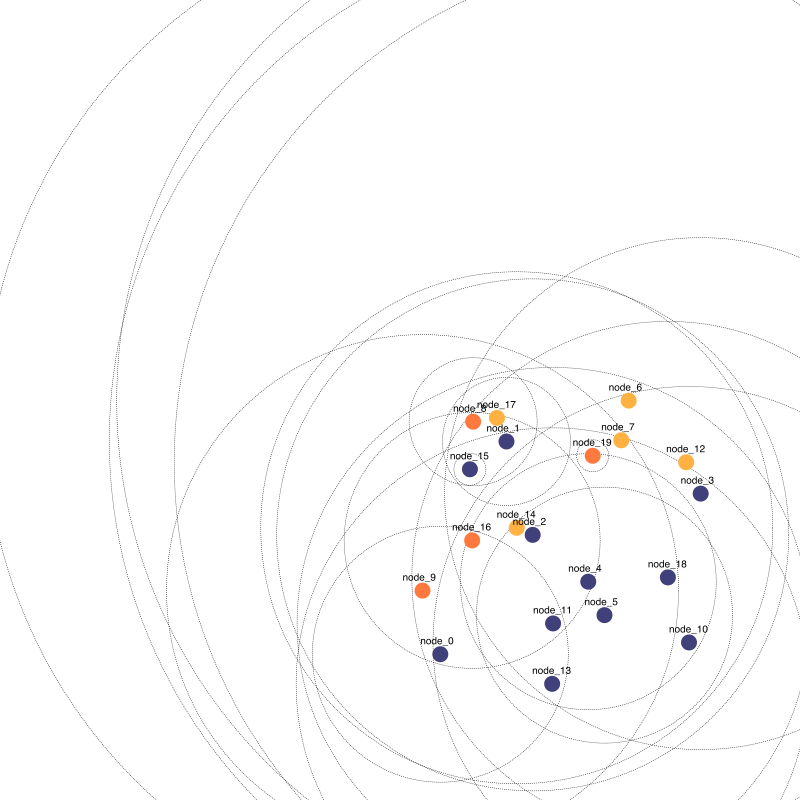

In [57]:
from io import BytesIO
import numpy as np
import cairo
import IPython.display

svgio = BytesIO()
side = 800

with cairo.SVGSurface(svgio, side, side) as surface:
    context = cairo.Context(surface)
    #context.scale(0.3,0.3)
    context.translate(side/2, side/2)
    
    context.set_source_rgba(0,0,0,1)
    context.set_dash([1.0])
    context.set_line_width(0.5)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.arc(X, Y, compute_radius(Name, Df, 16), 0, 2*np.pi)
        context.stroke()
        
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.set_source_rgba(*palette[Level])
        context.arc(X, Y, 8, 0, 2*np.pi)
        context.fill()
    
    context.set_source_rgba(0,0,0,1)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.move_to(X-20,Y-10)
        context.show_text(Name)
        context.stroke()
    
    
    
IPython.display.SVG(data=svgio.getvalue())

In [59]:
with open('epoch'+str(epoch)+'_map.svg', 'wb') as f:
    f.write(svgio.getvalue())
svgio.close()